# INJURY PREDICITON
Roger Duran

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
# Baixem el dataset
df_injury = pd.read_csv('injury_data.csv')

df_injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [3]:
df_injury['Player_Weight'] = df_injury['Player_Weight'].round(0)
df_injury['Player_Height'] = df_injury['Player_Height'].round(0)
df_injury['Training_Intensity'] = df_injury['Training_Intensity'].round(0)



In [4]:
# Observem els types i si hi ha valors nuls 
df_info = pd.DataFrame(df_injury.dtypes, columns=['Data Type'])
df_info['Unique'] = df_injury.nunique()
df_info['Null'] = df_injury.isnull().sum().values
df_info

,Data Type,Unique,Null
Player_Age,int64,22,0
Player_Weight,float64,58,0
Player_Height,float64,54,0
Previous_Injuries,int64,2,0
Training_Intensity,float64,2,0
Recovery_Time,int64,6,0
Likelihood_of_Injury,int64,2,0


Podem obsevar que columnes com el Edat, Pes, l'Altura i la intensitat de entrenament tenen molts valors unics. Una de les opcions que tenim seria agrupar aluns valors.

### ANALISI EXPLORATORIA
Analitzarem les columnes del dataset

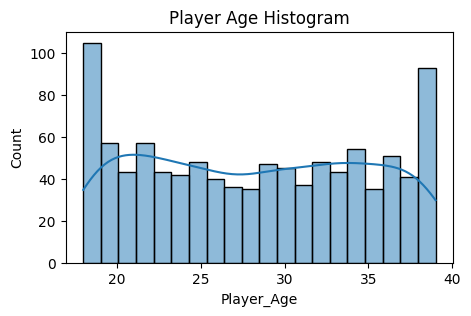

In [5]:
# Player Age histrograma
plt.figure(figsize=(5, 3))

sns.histplot(data=df_injury, x='Player_Age', bins=20, kde=True)
plt.title('Player Age Histogram')
plt.show()

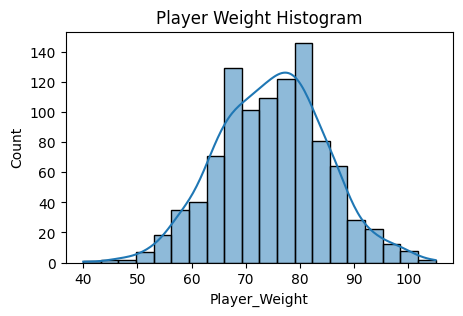

In [6]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Player_Weight', bins=20, kde=True)
plt.title('Player Weight Histogram')
plt.show()

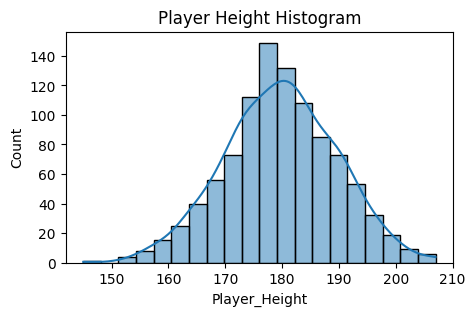

In [7]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Player_Height', bins=20, kde=True)
plt.title('Player Height Histogram')
plt.show()

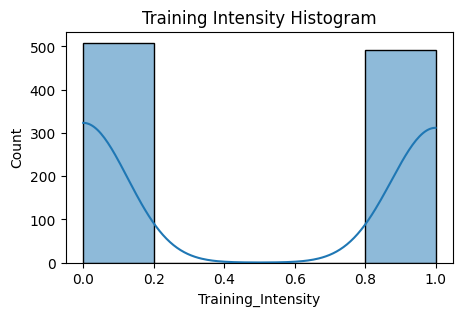

In [8]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Training_Intensity', bins=5, kde=True)
plt.title('Training Intensity Histogram')
plt.show()

### ESTANDARITZACIÓ DE LES DADES


In [9]:
X=df_injury.drop('Likelihood_of_Injury', axis=1)
y=df_injury['Likelihood_of_Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)


# Convertim les dades a DataFrame
X_train_final = pd.DataFrame(X_train_standard, columns=X.columns)
print(X_train_final.head())

X_test_final = pd.DataFrame(X_test_standard, columns=X.columns)
print(X_test_final.head())


   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0    1.639194       0.112595       1.124716           0.969358   
1    0.273480       1.737211       0.923893          -1.031610   
2   -0.940488      -0.293559       0.120605          -1.031610   
3    1.335702       0.823364       0.120605           0.969358   
4    0.728718       0.315672      -0.582273          -1.031610   

   Training_Intensity  Recovery_Time  
0            0.997780       0.903495  
1            0.997780      -1.451742  
2           -1.002225       0.903495  
3            0.997780      -0.862933  
4           -1.002225      -1.451742  
   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0    0.121734      -0.902790       0.020194          -1.031610   
1   -1.395726      -1.308944      -0.983917          -1.031610   
2   -1.395726      -0.699713       1.827593          -1.031610   
3    1.183956       0.518749      -0.582273          -1.031610   
4   -0.485250       0.620287       0.02

In [10]:
#Generem un diccionari de models
models = {
    'NuSVC': NuSVC(probability=True),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'Neural Network (MLPClassifier)': MLPClassifier(),
    'SVM (SVC)': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    sensibilitat = recall_score(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precisio = precision_score(y_test, y_pred)
  
    print(f'Model: {model_name}')
    print(f'Exactitud: {exactitud}')
    print(f'Sensibilitat: {sensibilitat}')
    print(f'Precisió: {precisio}')
    print('\n================================')

Model: NuSVC
Exactitud: 0.58
Sensibilitat: 0.5423728813559322
Precisió: 0.6808510638297872

Model: ExtraTreeClassifier
Exactitud: 0.55
Sensibilitat: 0.4915254237288136
Precisió: 0.6590909090909091



c:\Users\roger\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network (MLPClassifier)
Exactitud: 0.47
Sensibilitat: 0.3559322033898305
Precisió: 0.5833333333333334

Model: SVM (SVC)
Exactitud: 0.57
Sensibilitat: 0.4915254237288136
Precisió: 0.6904761904761905

Model: Decision Tree
Exactitud: 0.57
Sensibilitat: 0.5084745762711864
Precisió: 0.6818181818181818

Model: Random Forest
Exactitud: 0.51
Sensibilitat: 0.4576271186440678
Precisió: 0.6136363636363636



### TRIA DEL MODEL


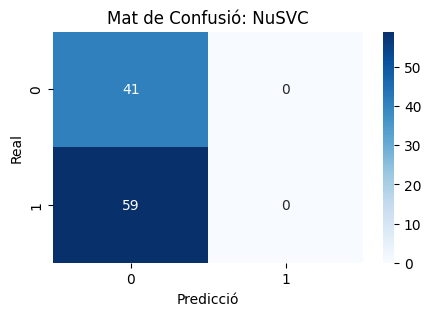

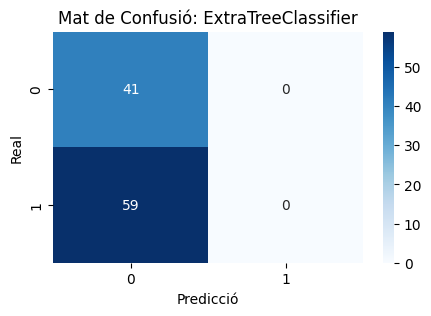

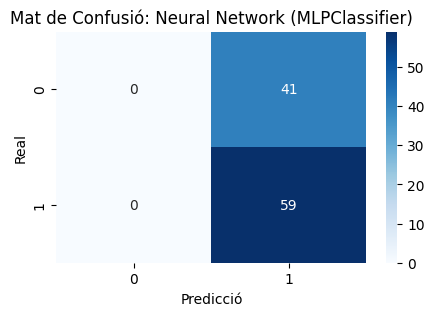

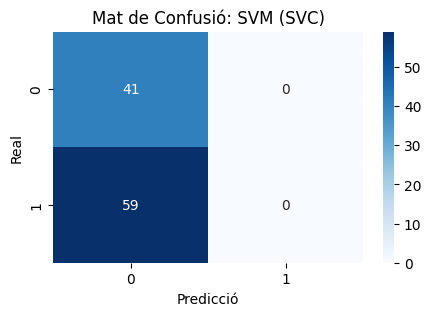

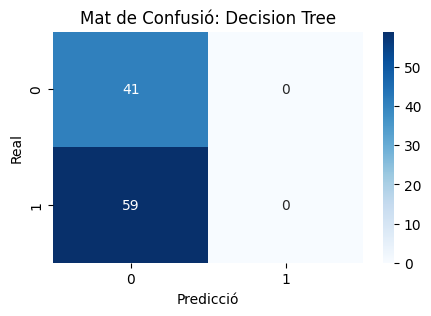

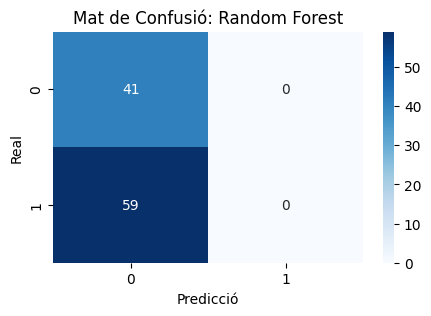

In [11]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    matriu_confusio=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(matriu_confusio, annot=True, fmt='d', cmap='Blues')
    set_title = plt.title(f'Mat de Confusió: {model_name}')
    plt.xlabel('Predicció')
    plt.ylabel('Real')



plt.show()